In [13]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

In [14]:
def muestra(img):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.xticks([]),plt.yticks([]) #Ocultar ejes
    plt.show()

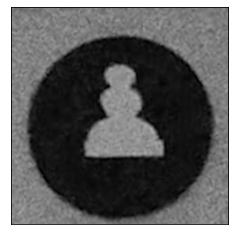

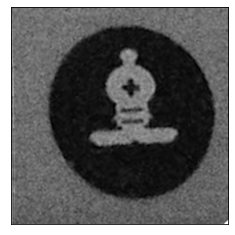

In [15]:
peon = cv2.cvtColor(cv2.imread("./imagenes/fichas/PeonBlanco1.png"), cv2.COLOR_BGR2GRAY)
muestra(peon)
alfil = cv2.cvtColor(cv2.imread("./imagenes/fichas/AlfilBlanco.png"), cv2.COLOR_BGR2GRAY)
muestra(alfil)

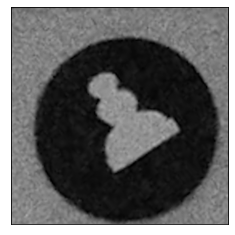

In [16]:
img = cv2.cvtColor(cv2.imread("./imagenes/fichas/PeonBlanco1Rotado.png"), cv2.COLOR_BGR2GRAY)
muestra(img)

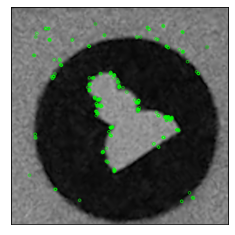

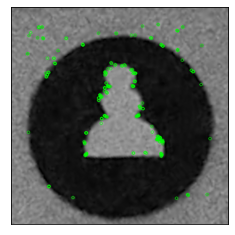

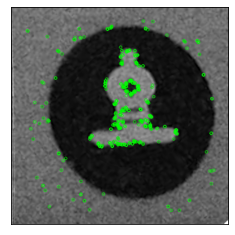

In [17]:
# Initiate ORB detector
orb = cv2.ORB_create()

# compute the descriptors with ORB
kp, des = orb.detectAndCompute(img, None)

kpP, desP = orb.detectAndCompute(peon, None)
kpA, desA = orb.detectAndCompute(alfil, None)

# draw only keypoints location,not size and orientation
muestra(cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0))
muestra(cv2.drawKeypoints(peon, kpP, None, color=(0,255,0), flags=0))
muestra(cv2.drawKeypoints(alfil, kpA, None, color=(0,255,0), flags=0))

In [18]:
def distanciaMedia(matches):
    return sum(map(lambda m: m.distance,matches)) / len(matches)

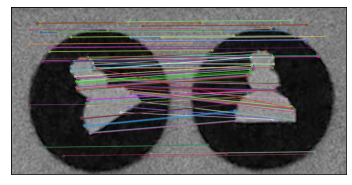

24.543956043956044

In [23]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des,desP)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img,kp,peon,kpP,matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
muestra(img3)
distanciaMedia(matches)

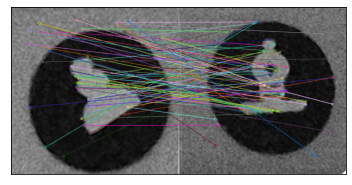

64.04651162790698

In [24]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des,desA)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img4 = cv2.drawMatches(img,kp,alfil,kpA,matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
muestra(img4)
distanciaMedia(matches)